In [15]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np


NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [18]:
class Bandit:
    def __init__(self, p):
        self.p = p # bandit real mean probability
        self.p_estimate = 0. # initialize mean probability 0 at the start (unknown)
        self.N = 0. # number of bandit played (num of samples collected)

    def pull(self):
        return np.random.random() < self.p # return 1 if random number between 0,1 is less than p -> resulting return 1 with probability p
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N-1) * self.p_estimate + x) / self.N
    

def experiment():
    bandits = [Bandit(bp) for bp in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)

    for b in bandits: # pull the each bandit once
        x = b.pull()
        b.update(x)

    for i in range(NUM_TRIALS):
        N = np.sum([b.N for b in bandits])
        j = np.argmax([b.p_estimate + ((2 * np.log(N)/b.N) ** 0.5) for b in bandits]) # find j from UCB1 equation
    
        x = bandits[j].pull() # x -> result from pulled bandit, kind of reward from action pull on selected bandit

        rewards[i] = x # update reward log

        bandits[j].update(x) # update mean estimate probability of pulled bandit

    for b in bandits:
        print("mean estimate:", b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num of times selected bandit:", [b.N for b in bandits])
    
    cum_rewards = np.cumsum(rewards)
    win_rates = cum_rewards / (np.arange(NUM_TRIALS) + 1) # np.arange 0 to NUM_TRIALS - 1, +1 to make it 1 to NUM_TRIALS
    plt.ylim([0,1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

mean estimate: 0.12195121951219512
mean estimate: 0.47894736842105273
mean estimate: 0.7497953336062215
total reward earned: 7421.0
overall win rate: 0.7421
num of times selected bandit: [41.0, 190.0, 9772.0]


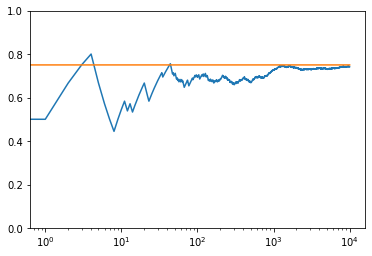

In [20]:
if __name__ == '__main__':
    experiment()